In [196]:
import random as rand
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt

This generates data by sampling, pretty arbitrary data can be formed this way.

In [75]:
data = [rand.randint(1,6) + rand.randint(1,6) + rand.randint(1,6) for i in range(2000)]
data.sort()

The following generates data by generating all possible outcomes. This is more precise than the peceding, but become more computationally difficult.

In [223]:
rolls = ((i,j,k) for i in range(1,7) for j in range(1,7) for k in range(1,7))
data = [sum(a) for a in rolls]
data.sort()

Either of the above provides a nice example of a discrete distrbution.

In [224]:
rng = range(-2,22)
rng1 = range(-2,23)
y = [len([i for i in data if i <= b])/len(data) for b in rng1]

In [232]:
mean = np.mean(data)
sd = np.std(data)
rv = stats.norm()
xpts = np.linspace(-2,22, 100)
ypts_pdf = rv.pdf((xpts - mean)/sd)/sd
ypts_cdf = rv.cdf((xpts - mean)/sd)/sd


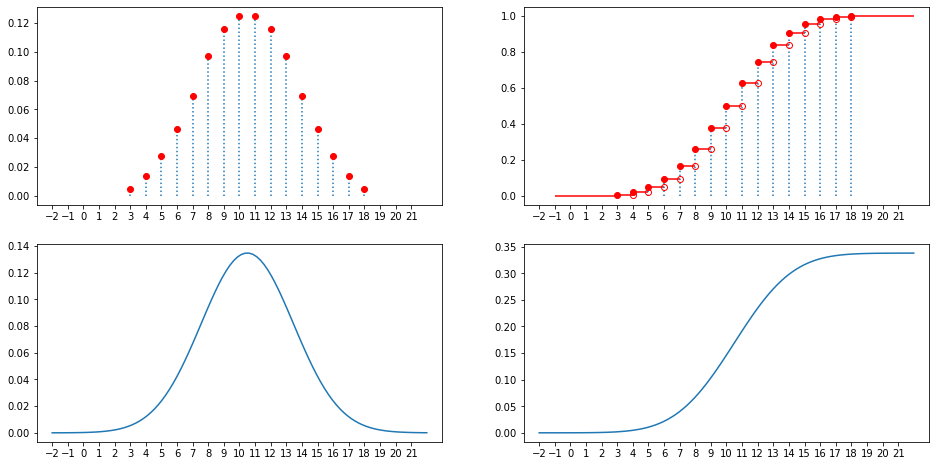

In [233]:

fig, ax = plt.subplots(2,2,figsize=(16,8))
eps = .1

ax[0,1].hlines(y[1:-1], range(-1,22), range(-0,23), color='red')

for j in range(3,18):    
    ax[0,1].plot([j + 1], y[4 + j - 2], "ro", fillstyle='none')
    
ax[0,1].stem(range(3,19),[y[i + 5] for i in range(16)],
            use_line_collection=True, linefmt=":", markerfmt="ro", basefmt='none')
    
ax[0,1].set_xlim(-3,23)
ax[0,1].set_xticks(range(-2,22))

ax[0,0].stem(range(3,19),[y[i+5]-y[i+4] for i in range(16)],
            use_line_collection=True, linefmt=":", markerfmt="ro", basefmt='none')
ax[0,0].set_xlim(-3,23)
ax[0,0].set_xticks(range(-2,22))

ax[1,0].plot(xpts,ypts_pdf)
ax[1,0].set_xlim(-3,23)
ax[1,0].set_xticks(range(-2,22))

ax[1,1].plot(xpts, ypts_cdf)
ax[1,1].set_xlim(-3,23)
ax[1,1].set_xticks(range(-2,22))

plt.savefig('cum_dist.png')